In [9]:
import pandas as moon
data = moon.read_excel('./moon.xlsx')
print('共计：', data.shape[0],'行','，',data.shape[1],'列')
data.head()

共计： 275 行 ， 16 列


,Possibility,Age,Menopause,Treatment,Diseases,MBNG,Stage,T,N,M,Infiltration,Her-2,Ki-67,Luminal,ER status,PR status
0,1,1,0,2,1,3,2,2,1,0,0,1,1,1,1,1
1,1,1,0,1,0,2,1,1,0,0,0,1,2,2,1,1
2,1,1,0,1,0,2,2,1,1,0,2,1,1,1,1,1
3,2,1,1,1,0,3,3,2,3,0,2,3,2,3,0,0
4,1,1,1,1,0,3,2,2,0,0,0,1,2,2,0,0


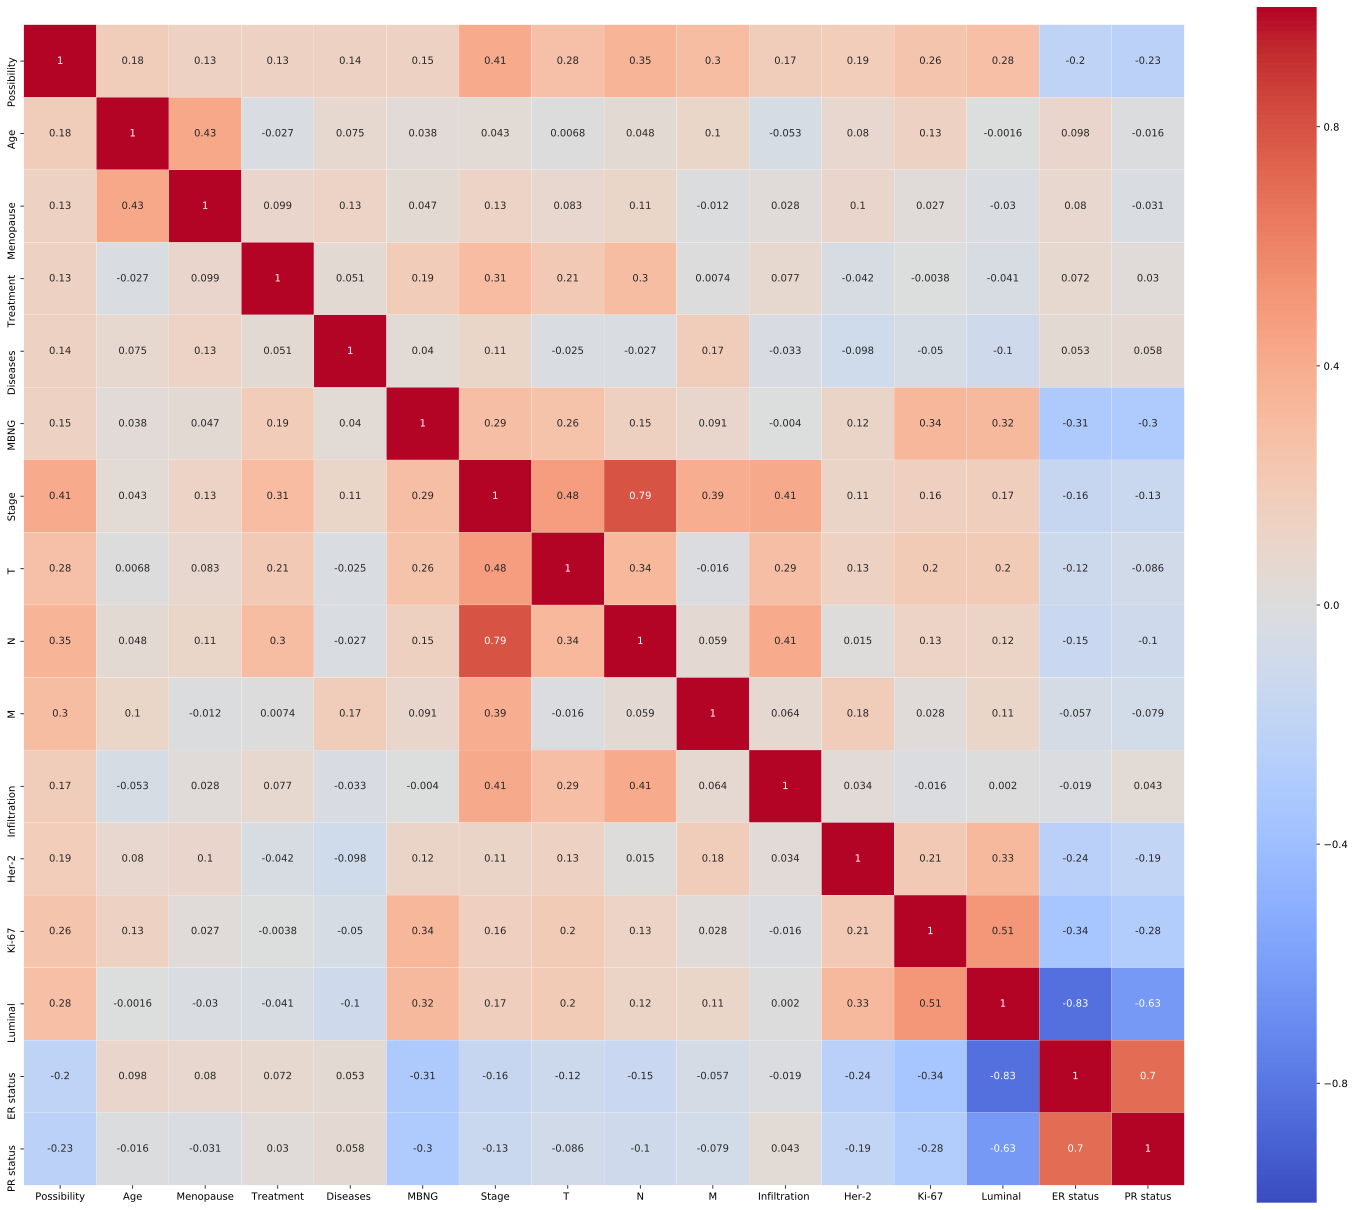

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import seaborn as sns
import scikitplot as skplt

from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.figure(figsize=(26, 22))
sns.heatmap(data.astype(float).corr(),
            linewidths=0.1,
            square=True,
            cmap='coolwarm',
            linecolor='white',
            annot=True,
            vmax=1,
            vmin=-1);import pandas as moon

In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier

data = data.dropna()
X, y = data.values[:, 1:], data.values[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y)

models = {
    'LR': LogisticRegression(solver='liblinear', multi_class='auto'),
    'QDA': QuadraticDiscriminantAnalysis(),
    'NB': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(gamma='scale'),
    'DT': DecisionTreeClassifier(),
    'RF': RandomForestClassifier(n_estimators=100),
    'AB': AdaBoostClassifier(),
    'ET': ExtraTreesClassifier(n_estimators=100),
    }

models['VC'] = VotingClassifier(estimators=[('lr', models['LR']),  ('qda', models['QDA']),
                                            ('nb', models['NB']), ('knn', models['KNN']), ('svm', models['SVM']),
                                            ('cart', models['DT']), ('rfc', models['RF']), ('abc', models['AB']),
                                             ('etc', models['ET'])], voting='hard')

kfold = StratifiedKFold(n_splits=10)
cv_result = []

for key in models:
        models[key].fit(X_train, y_train)
        cv_score = cross_val_score(
            models[key], X_train, y_train, scoring="accuracy", cv=kfold)
        cv_means = round(cv_score.mean(), 2)
        acc_score = round(models[key].score(X_test, y_test), 2)
        #cvresult = {'models': key, 'score': cv_means, 'type': 'cv'}
        #cv_result.append(cvresult)
        cvresult = {'models': key, 'score': acc_score, 'type': 'acc'}
        cv_result.append(cvresult)

cv_results = moon.DataFrame(cv_result)
plt.figure(figsize=(14, 10))
#sns.set(style="whitegrid")
#g = sns.barplot(x='score', y='models', hue='type', data=cv_results, palette="muted");
#g.set_xticks(np.arange(0, 1.05, 0.05));
#print(cv_results)

D:\GitHub\WPy64-3741\python-3.7.4.amd64\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\GitHub\WPy64-3741\python-3.7.4.amd64\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\GitHub\WPy64-3741\python-3.7.4.amd64\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\GitHub\WPy64-3741\python-3.7.4.amd64\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\GitHub\WPy64-3741\python-3.7.4.amd64\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\GitHub\WPy64-3741\python-3.7.4.amd64\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables a

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score,f1_score

X, y = data.values[:, 1:], data.values[:, 0]
testsize = 0.2
seed =5

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=testsize,random_state=seed)
dt = DecisionTreeClassifier(criterion="gini",random_state=seed,max_depth=7)
dt.fit(X_train, y_train)

kfold = KFold(n_splits=10,random_state=seed)

cv_score = cross_val_score(dt, X_train, y_train, scoring="accuracy", cv=kfold)
cv_std = round(cv_score.std(), 2)
print('Test accuracy:%.4f'%dt.score(X_test,y_test),cv_std)

y_pred = dt.predict(X_test)
print('%.4f'% precision_score(y_true=y_test,y_pred=y_pred))
print('%.4f'% recall_score(y_true=y_test,y_pred=y_pred))
print('%.4f'% f1_score(y_true=y_test,y_pred=y_pred))

Test accuracy:0.9091 0.05
0.9756
0.9091
0.9412


[2 2 2 2 2 1 1 1 1 1 2 2 1 1 1 1] [2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1]


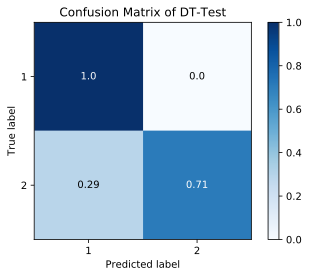

0.875


In [13]:
import pandas as pre
pre = pre.read_excel('./pre.xlsx')
X_test=pre.values[:, 1:]
y=pre.values[:, 0]
predictions = dt.predict(X_test)
print(y,predictions)
acc=accuracy_score(y, predictions)
skplt.metrics.plot_confusion_matrix(y, predictions, normalize=True)
plt.title('Confusion Matrix of DT-Test')
plt.show()
print (acc)

ValueError: Found input variables with inconsistent numbers of samples: [55, 16]

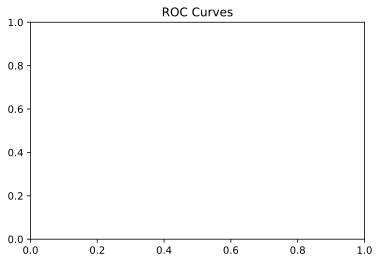

In [14]:
predicted_probas =dt.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, predicted_probas)
plt.title('ROC Curves of DT')
plt.show()

y_pred = dt.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.title('Confusion Matrix of DT')
plt.show()

skplt.estimators.plot_learning_curve(dt, X_train, y_train, cv=30)
plt.title('Learning Curve of DT')
plt.show()

y_probas = dt.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.title('Precision-Recall Curve of DT')
plt.show()

In [15]:
X, y = data.values[:, [4,6,7,8,9,10,13,15]], data.values[:, 0]#
testsize = 0.2
seed =5

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=testsize,random_state=seed)
dt = DecisionTreeClassifier(criterion="gini",random_state=seed,max_depth=6)
dt.fit(X_train, y_train)

kfold = KFold(n_splits=10,random_state=seed)

cv_score = cross_val_score(dt, X_train, y_train, scoring="accuracy", cv=kfold)
cv_std = round(cv_score.std(), 2)
print('Test accuracy:%.4f'%dt.score(X_test,y_test),cv_std)

y_pred = dt.predict(X_test)
print('%.4f'% precision_score(y_true=y_test,y_pred=y_pred))
print('%.4f'% recall_score(y_true=y_test,y_pred=y_pred))
print('%.4f'% f1_score(y_true=y_test,y_pred=y_pred))

Test accuracy:0.9091 0.05
0.9333
0.9545
0.9438


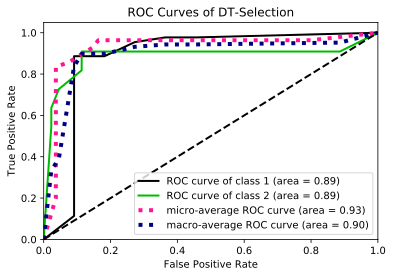

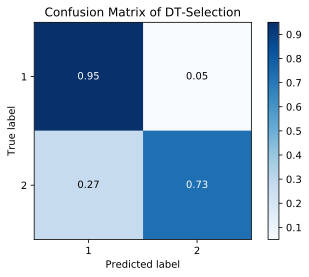

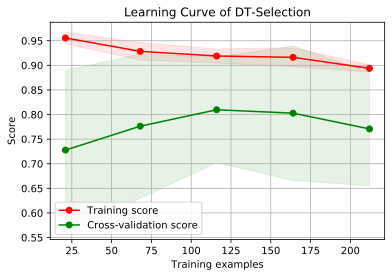

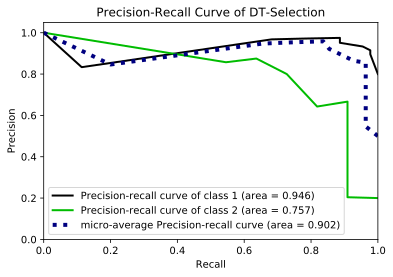

In [16]:
predicted_probas =dt.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, predicted_probas)
plt.title('ROC Curves of DT-Selection')
plt.show()

y_pred = dt.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.title('Confusion Matrix of DT-Selection')
plt.show()

skplt.estimators.plot_learning_curve(dt, X_train, y_train, cv=30)
plt.title('Learning Curve of DT-Selection')
plt.show()

y_probas = dt.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.title('Precision-Recall Curve of DT-Selection')
plt.show()

1 0.8 0.85
2 0.81 0.85
3 0.81 0.85
4 0.82 0.84
5 0.8 0.87
6 0.8 0.85
7 0.82 0.91
8 0.8 0.91
9 0.82 0.89
10 0.81 0.87
11 0.82 0.85
12 0.79 0.84
13 0.79 0.87
14 0.78 0.89
15 0.8 0.91


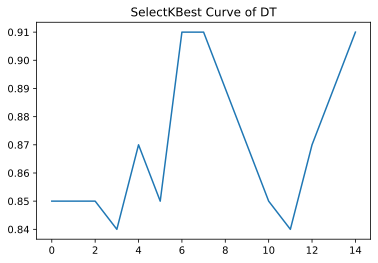

In [17]:
from sklearn.feature_selection import SelectKBest, chi2
cv_m = []
cv_acc = []
X= data.values[:, 1:]
y= data.values[:, 0]
testsize = 0.2
for i in range(1,data.shape[1]): 
    ch2=SelectKBest(chi2, k=i)
    X_f = ch2.fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_f, y,test_size=testsize,random_state=seed)
    m_f = DecisionTreeClassifier(criterion="gini",random_state=seed,max_depth=7)
    m_f.fit(X_train, y_train)
    cv_score = cross_val_score(m_f, X_train, y_train, scoring="accuracy", cv=kfold)
    cv_means = round(cv_score.mean(), 2)
    acc_score = round(m_f.score(X_test, y_test), 2)
    cv_m.append(cv_means)
    cv_acc.append(acc_score)
    print(i, cv_means, acc_score)
plt.title('SelectKBest Curve of DT')
plt.plot(range(15), cv_acc)

In [25]:
transformer = SelectKBest(score_func=chi2, k=7)
X_new=transformer.fit_transform(X, y)
print(transformer.scores_)

import matplotlib.pyplot as plt
features_list = data.columns[1:16]
feature_importance = transformer.scores_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(6,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances of DT')
plt.draw()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [275, 16]

In [19]:
from sklearn.ensemble import RandomForestClassifier
X, y = data.values[:, 1:], data.values[:, 0]
testsize = 0.2
seed = 5

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=testsize,random_state=seed)
rf = RandomForestClassifier(random_state=seed,n_estimators=100,max_depth=9)
rf.fit(X_train, y_train)

kfold = KFold(n_splits=10,random_state=seed)

cv_score = cross_val_score(rf, X_train, y_train, scoring="accuracy", cv=kfold)
cv_std = round(cv_score.std(), 2)
print('Test accuracy:%.4f'%rf.score(X_test,y_test),cv_std)

y_pred = rf.predict(X_test)
print('%.4f'% precision_score(y_true=y_test,y_pred=y_pred))
print('%.4f'% recall_score(y_true=y_test,y_pred=y_pred))
print('%.4f'% f1_score(y_true=y_test,y_pred=y_pred))

Test accuracy:0.9091 0.06
0.9535
0.9318
0.9425


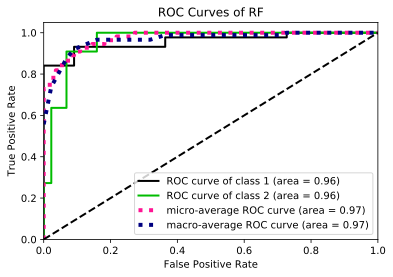

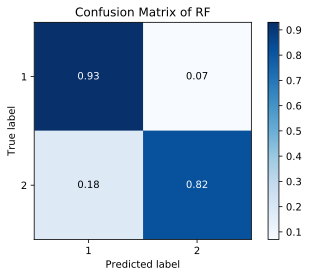

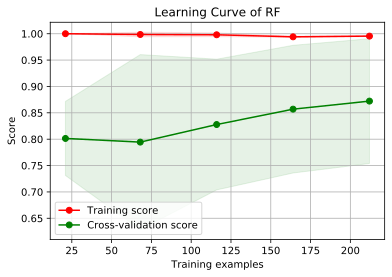

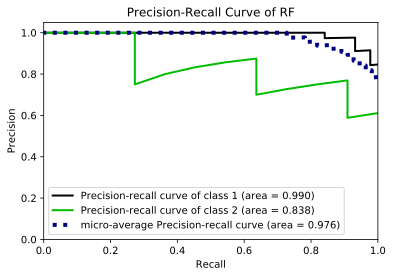

In [20]:
predicted_probas =rf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, predicted_probas)
plt.title('ROC Curves of RF')
plt.show()

y_pred = rf.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.title('Confusion Matrix of RF')
plt.show()

skplt.estimators.plot_learning_curve(rf, X_train, y_train, cv=30)
plt.title('Learning Curve of RF')
plt.show()

y_probas = rf.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.title('Precision-Recall Curve of RF')
plt.show()

1 0.8 0.85
2 0.81 0.85
3 0.81 0.85
4 0.82 0.84
5 0.81 0.87
6 0.82 0.87
7 0.85 0.87
8 0.86 0.85
9 0.86 0.87
10 0.84 0.85
11 0.86 0.87
12 0.86 0.91
13 0.86 0.93
14 0.86 0.91
15 0.86 0.91


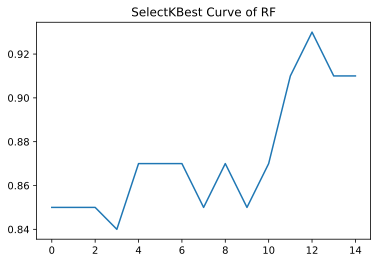

In [21]:
cv_m = []
cv_acc = []
X= data.values[:, 1:]
y= data.values[:, 0]
testsize = 0.2
for i in range(1,data.shape[1]): 
    ch2=SelectKBest(chi2, k=i)
    X_f = ch2.fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_f, y,test_size=testsize,random_state=seed)
    m_f = RandomForestClassifier(random_state=seed,n_estimators=100,max_depth=9)
    m_f.fit(X_train, y_train)
    cv_score = cross_val_score(m_f, X_train, y_train, scoring="accuracy", cv=kfold)
    cv_means = round(cv_score.mean(), 2)
    acc_score = round(m_f.score(X_test, y_test), 2)
    cv_m.append(cv_means)
    cv_acc.append(acc_score)
    print(i, cv_means, acc_score)
plt.title('SelectKBest Curve of RF')
plt.plot(range(15), cv_acc)

In [22]:
X, y = data.values[:, [1,2,4,6,7,8,9,10,11,12,13,14,15]], data.values[:, 0]
testsize = 0.2
seed = 5

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=testsize,random_state=seed)
rf = RandomForestClassifier(random_state=seed,n_estimators=100,max_depth=9)
rf.fit(X_train, y_train)

kfold = KFold(n_splits=10,random_state=seed)

cv_score = cross_val_score(rf, X_train, y_train, scoring="accuracy", cv=kfold)
cv_std = round(cv_score.std(), 2)
print('Test accuracy:%.4f'%rf.score(X_test,y_test),cv_std)

y_pred = rf.predict(X_test)
print('%.4f'% precision_score(y_true=y_test,y_pred=y_pred))
print('%.4f'% recall_score(y_true=y_test,y_pred=y_pred))
print('%.4f'% f1_score(y_true=y_test,y_pred=y_pred))

Test accuracy:0.9273 0.04
0.9545
0.9545
0.9545


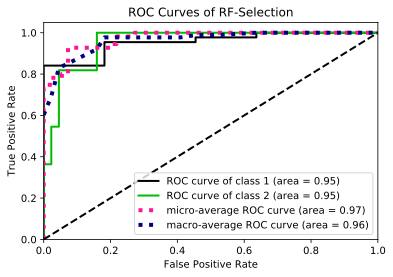

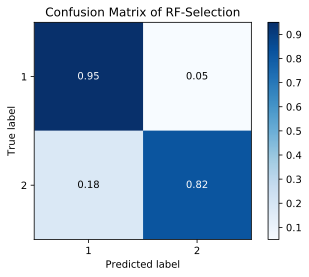

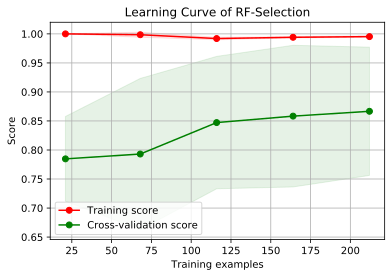

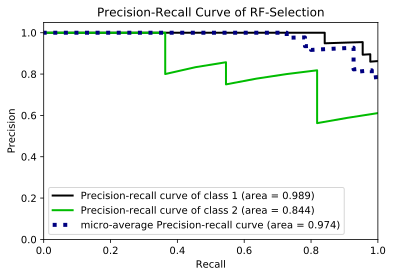

In [23]:
predicted_probas =rf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, predicted_probas)
plt.title('ROC Curves of RF-Selection')
plt.show()

y_pred = rf.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.title('Confusion Matrix of RF-Selection')
plt.show()

skplt.estimators.plot_learning_curve(rf, X_train, y_train, cv=30)
plt.title('Learning Curve of RF-Selection')
plt.show()

y_probas = rf.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.title('Precision-Recall Curve of RF-Selection')
plt.show()

[2 2 2 2 2 1 1 1 1 1 2 2 1 1 1 1] [1 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1]


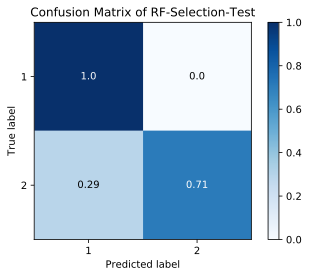

0.875


In [24]:
X_test=pre.values[:,[1,2,4,6,7,8,9,10,11,12,13,14,15]]
y=pre.values[:, 0]
predictions = rf.predict(X_test)
print(y,predictions)
acc=accuracy_score(y, predictions)
skplt.metrics.plot_confusion_matrix(y, predictions, normalize=True)
plt.title('Confusion Matrix of RF-Selection-Test')
plt.show()
print (acc)